In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy

In [34]:
df=pd.read_csv('/content/drive/MyDrive/AirLines-Passengers-Forecasting-LSTM-master/AirPassengers.csv')

In [35]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [36]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


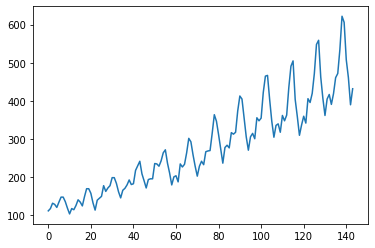

In [37]:
plt.plot(df.iloc[:,1])

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
df.iloc[:,1]

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [40]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [41]:
df.shape

(144, 1)

In [42]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [43]:
training_size=int(len(df)*0.65)

In [44]:
training_size

93

In [45]:
test_size=len(df)-training_size

In [46]:
test_size

51

In [47]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [48]:
test_data

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [49]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [50]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
X_train.shape, y_train.shape

((88, 4), (88,))

In [52]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [53]:
X_train.shape

(88, 4, 1)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
88/88 [==============================] - 1s 12ms/step - loss: 0.0118 - val_loss: 0.0336
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0307
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 0.0370
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.0281
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0252
Epoch 6/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0296
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0243
Epoch 8/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0223
Epoch 9/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0258
Epoch 10/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0246
Epoch 11

In [56]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [57]:
test_predict

array([[0.3985717 ],
       [0.36356783],
       [0.5419222 ],
       [0.42255774],
       [0.49472123],
       [0.6806145 ],
       [0.6789107 ],
       [0.6398137 ],
       [0.44346383],
       [0.41141012],
       [0.34486222],
       [0.48441002],
       [0.43269968],
       [0.38535076],
       [0.54837435],
       [0.41550997],
       [0.52123004],
       [0.7073082 ],
       [0.7431192 ],
       [0.70847666],
       [0.35210913],
       [0.48743042],
       [0.31976253],
       [0.48697358],
       [0.49130166],
       [0.41921058],
       [0.6639545 ],
       [0.47376   ],
       [0.647465  ],
       [0.7308172 ],
       [0.89269316],
       [0.7145693 ],
       [0.4380142 ],
       [0.52918977],
       [0.38179034],
       [0.6298752 ],
       [0.5444751 ],
       [0.49181256],
       [0.64585   ],
       [0.68265253],
       [0.6451331 ],
       [0.8999537 ],
       [0.9826777 ],
       [0.6381614 ],
       [0.5233826 ],
       [0.5656767 ]], dtype=float32)

In [58]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
test_predict

array([[310.46014],
       [292.32816],
       [384.71573],
       [322.88492],
       [360.26562],
       [456.55832],
       [455.67575],
       [435.42352],
       [333.71426],
       [317.11044],
       [282.63864],
       [354.92438],
       [328.13846],
       [303.6117 ],
       [388.05792],
       [319.23416],
       [373.99716],
       [470.38565],
       [488.93576],
       [470.99094],
       [286.39255],
       [356.48895],
       [269.637  ],
       [356.25232],
       [358.49426],
       [321.1511 ],
       [447.92844],
       [349.40768],
       [439.38687],
       [482.56332],
       [566.41504],
       [474.14688],
       [330.8914 ],
       [378.1203 ],
       [301.7674 ],
       [430.27536],
       [386.03812],
       [358.7589 ],
       [438.55032],
       [457.614  ],
       [438.17896],
       [570.176  ],
       [613.02704],
       [434.56763],
       [375.1122 ],
       [397.02054]], dtype=float32)

In [60]:
y_train.shape,train_predict.shape,train_predict

((88,), (88, 1), array([[131.13474 ],
        [124.31597 ],
        [137.09805 ],
        [149.51811 ],
        [149.78532 ],
        [139.03728 ],
        [123.70779 ],
        [109.67465 ],
        [120.26883 ],
        [117.703186],
        [127.351814],
        [142.07616 ],
        [137.11903 ],
        [128.5026  ],
        [150.9594  ],
        [171.46654 ],
        [171.06577 ],
        [160.12474 ],
        [137.0549  ],
        [119.90407 ],
        [142.28783 ],
        [146.64612 ],
        [151.72133 ],
        [180.41795 ],
        [163.69618 ],
        [175.21019 ],
        [180.84201 ],
        [202.63179 ],
        [200.04094 ],
        [184.73352 ],
        [164.48494 ],
        [150.38036 ],
        [170.16193 ],
        [173.17224 ],
        [182.3504  ],
        [195.92668 ],
        [181.6871  ],
        [186.30959 ],
        [224.48746 ],
        [231.63396 ],
        [244.8974  ],
        [203.01999 ],
        [193.54074 ],
        [174.98846 ],
        [199.890

In [61]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.39365647371542

In [62]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

400.0546636088083

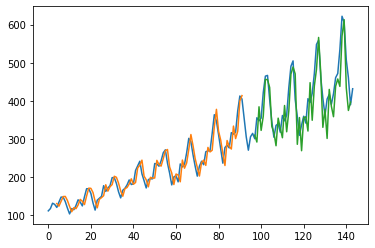

In [66]:
### Plotting 
# shift train predictions for plotting
lookback=4
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(train_predict)+lookback, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(lookback*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()